# Practice Lecture 15  
## Deep Neural Networks
In this lab we will use Deep Neural Networks for classification and regression. \
Based on Chapter 10 from Aurelien Geron's book, Hands-on Machine Learning with Scikit-Learn Keras & Tensorflow.\
Original code examples from book in github [here](https://github.com/ageron/handson-ml2)

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/dtrad/geoml_course/blob/master/Practice15-NeuralNetworks.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
</table>

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"
sklearn.set_config(print_changed_only=False)

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

### IF NOT COLLAB (see Lecture 3 on installing GPU drivers):
To use the GPU you need to install tensorflow-gpu (no just tensorflow). \
Also you need to install first the NVIDIA drivers from here:\
https://developer.nvidia.com/cuda-toolkit-archive \
You need to have in your environment the libraries "cudnn" and "cudatoolkit". \
These may be installed with tensorflow-gpu automatically.\
For example, in my system, I have:

In [2]:
try:
    !conda list | grep cudatoolkit
    !conda list | grep cudnn
except:
    pass

cudatoolkit               11.5.0               h36ae40a_9    conda-forge
cudnn                     8.2.1.32             h86fa8c9_0    conda-forge


You will see different versions (as time passes). \
cudnn is a C++ Cuda library that is called by python DL libraries.\
Newer versions of Tensorflow may require newer drivers, but usually are backwards compatible. \
To check tensorflow is using the GPU you can try the following line:

In [3]:
print(tf.__version__)
tf.config.list_physical_devices()

2.6.0


[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'),
 PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]

### If COLLAB: 
Go to runtime and select GPU. \
The TPU option is faster but you need changes in the notebook, so we will only use GPU.

### Exercise 1: Classification with the Perceptron
Use scikit-learn to create a perceptron to classify the iris data set (single classification).\
Convert the data to binary classification (y==0 True, all others False).\
Use the Percetron in sklearn to obtain the values of the line that separates the two classes and plot them in one graphics


In [4]:
from sklearn.linear_model import Perceptron
from sklearn.datasets import load_iris

In [5]:
iris = load_iris()
X = iris.data[:,(2,3)]
y = iris.target

In [6]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
print(y.shape)
print(y.dtype)
print(y)

(150,)
int64
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [8]:
y2 = (iris.target == 0).astype(int)

In [9]:
print(y2.dtype)
print(y2)

int64
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


In [10]:
pct=Perceptron()
pct.fit(X,y2)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, l1_ratio=0.15, max_iter=1000, n_iter_no_change=5,
           n_jobs=None, penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

The coefficients w[0] and w[1] are in "\*.coef_". 

(1, 2)
(1,)
(150, 2)
(150,)
[[-0.7 -1.2]]
[2.]
-0.5833333333333338
1.6666666666666665


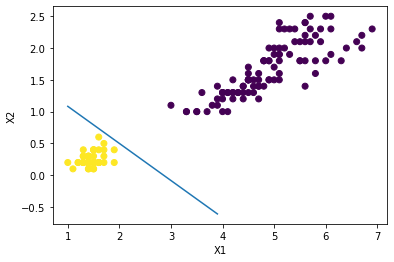

In [11]:
plt.figure()
plt.scatter(X[:,0],X[:,1],c=y2)
a=pct.coef_
b=pct.intercept_
print(a.shape)
print(b.shape)
print(X.shape)
print(y.shape)
print(a)
print(b)
m=-(a[0,0]/a[0,1])
b=-(b[0]/a[0,1])
print(m),print(b)
x=np.arange(1,4,0.1)
plt.plot(x,m*x+b)
plt.xlabel('X1')
plt.ylabel('X2');


### Exercise 2: Sequential NN
Build a classifier with keras for the MNIST data set.\
You need to convert the integer values that represent each pixel to floats between 0-1

In [12]:
from tensorflow import keras
import tensorflow as tf

In [13]:
print(tf.keras.__version__)

2.6.0


In [14]:
mnist = keras.datasets.mnist

Let us separate the training data in training and testing as before, but also we will need a portion for validation. This is used during training as well but only for hyperparameters.

In [15]:
(X,y),(Xt,yt) = mnist.load_data()
X=X/255.
Xt=Xt/255.
Xv=X[50001:]
yv=y[50001:]
X=X[:50000]
y=y[:50000]

In [16]:
print(X.shape,y.shape,Xv.shape,yv.shape,Xt.shape,yt.shape)

(50000, 28, 28) (50000,) (9999, 28, 28) (9999,) (10000, 28, 28) (10000,)


5


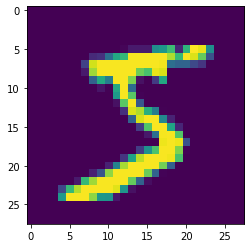

In [17]:
plt.figure()
plt.imshow(X[0])
print(y[0])

Build a sequential fully connected network. Because the output is multiclass we need "softmax" in output.

In [18]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation="relu"))
model.add(keras.layers.Dense(100,activation="relu"))
model.add(keras.layers.Dense(10,activation="softmax"))

2022-11-03 17:20:51.970764: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-03 17:20:53.221530: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1510] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 10236 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3060, pci bus id: 0000:09:00.0, compute capability: 8.6
2022-11-03 17:20:53.222234: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1510] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 5350 MB memory:  -> device: 1, name: NVIDIA GeForce RTX 2070 SUPER, pci bus id: 0000:05:00.0, compute capability: 7.5


In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [20]:
# number of parameters for each layer
def nparam(ninput, nneurons):
    return (ninput+1)*nneurons
print(nparam(784,300))
print(nparam(300,100))
print(nparam(100,10))

235500
30100
1010


Use sparse_categorical_crossentropy because:
* "sparse" classes are sparse (1 in 10)
* "categorical" because classes are exclusive
* "crossentropy" used for classification 

In [21]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])

Passing validation data is optional but it permits to evaluate accuracy with iterations.\
The output is a class with useful information

In [22]:
niter=10
history=model.fit(X,y,epochs=niter,validation_data=(Xv,yv))

2022-11-03 17:22:04.312827: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
  94/1563 [>.............................] - ETA: 2s - loss: 1.9542 - accuracy: 0.4372

2022-11-03 17:22:05.778891: I tensorflow/stream_executor/cuda/cuda_blas.cc:1760] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


1563/1563 [==============================] - 4s 2ms/step - loss: 0.6206 - accuracy: 0.8394 - val_loss: 0.3124 - val_accuracy: 0.9126
Epoch 2/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.3002 - accuracy: 0.9139 - val_loss: 0.2540 - val_accuracy: 0.9265
Epoch 3/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.2475 - accuracy: 0.9286 - val_loss: 0.2178 - val_accuracy: 0.9386
Epoch 4/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.2137 - accuracy: 0.9383 - val_loss: 0.1859 - val_accuracy: 0.9491
Epoch 5/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.1870 - accuracy: 0.9464 - val_loss: 0.1756 - val_accuracy: 0.9509
Epoch 6/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.1665 - accuracy: 0.9515 - val_loss: 0.1566 - val_accuracy: 0.9565
Epoch 7/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.1491 - accuracy: 0.9565 - val_loss: 0.1442 - val_accuracy: 0.9604
Epo

In [23]:
print(type(history))
history.params

<class 'keras.callbacks.History'>


{'verbose': 1, 'epochs': 10, 'steps': 1563}

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


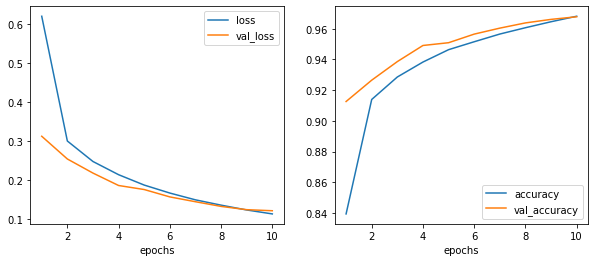

In [24]:
def plot_history(history):
    niter=history.params['epochs']
    print(history.history.keys())
    iter=np.arange(niter)+1
    plt.figure(figsize=(10,4))
    plt.subplot(121)
    plt.plot(iter,history.history['loss'],label='loss')
    plt.plot(iter,history.history['val_loss'],label='val_loss')
    plt.xlabel('epochs')
    plt.legend()
    plt.subplot(122)
    plt.plot(iter,history.history['accuracy'],label='accuracy')
    plt.plot(iter,history.history['val_accuracy'],label='val_accuracy')
    plt.xlabel('epochs')
    plt.legend()
plot_history(history)

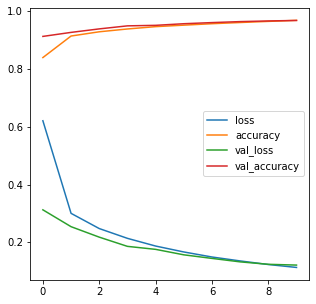

In [25]:
#Alternative plotting using pandas
import pandas as pd
def plot_historypd(history):
    pd.DataFrame(history.history).plot(figsize=(5,5))
plot_historypd(history)    

We can evaluate how it performs in the test data set.

In [26]:
model.evaluate(Xt,yt)

313/313 [==============================] - 1s 2ms/step - loss: 0.1224 - accuracy: 0.9639


[0.12237590551376343, 0.9639000296592712]

In [27]:
model.evaluate(Xt[:10],yt[:10])

1/1 [==============================] - 0s 18ms/step - loss: 0.2780 - accuracy: 0.9000


[0.27800148725509644, 0.8999999761581421]

In [28]:
print(yt[:9])

[7 2 1 0 4 1 4 9 5]


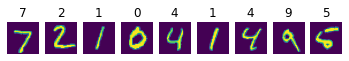

In [29]:
plt.figure()
for i in range(9):
    plt.subplot(191+i);plt.imshow(Xt[i]);plt.title(yt[i]),plt.axis('off')


The evaluate method gives the most probable class. We can see probabilities for each class using predict()

In [30]:
Xnew=Xt[:20]
ynew=yt[:20]
yproba=model.predict(Xnew)

In [31]:
print(yproba.round(3))

[[0.    0.    0.    0.002 0.    0.    0.    0.998 0.    0.   ]
 [0.    0.    0.996 0.004 0.    0.    0.    0.    0.    0.   ]
 [0.    0.988 0.003 0.001 0.    0.    0.001 0.005 0.001 0.   ]
 [1.    0.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.001 0.    0.919 0.    0.    0.002 0.    0.078]
 [0.    0.993 0.    0.    0.    0.    0.    0.006 0.    0.   ]
 [0.    0.    0.    0.    0.987 0.002 0.    0.001 0.007 0.003]
 [0.    0.    0.    0.001 0.001 0.    0.    0.001 0.    0.997]
 [0.01  0.    0.032 0.    0.01  0.071 0.87  0.    0.007 0.001]
 [0.    0.    0.    0.    0.002 0.    0.    0.007 0.001 0.99 ]
 [0.999 0.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.002 0.    0.003 0.    0.    0.001 0.985 0.    0.007 0.   ]
 [0.    0.    0.    0.    0.001 0.    0.    0.002 0.    0.997]
 [0.998 0.    0.    0.    0.    0.    0.    0.    0.    0.002]
 [0.    0.999 0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.001 0.    0.041 0.    0.954 0.    0.    0.004

To see the classes we use "predict_classes". Then we can compare with the true values (labels).

In [32]:
#yproba2=model.predict_classes(Xnew) # the old way 
yproba2=np.argmax(model.predict(Xnew), axis=-1) # the new more difficult way 
print(yproba2)

[7 2 1 0 4 1 4 9 6 9 0 6 9 0 1 5 9 7 3 4]


In [33]:
# labels
print(ynew)

[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


In [34]:
# errors
print(yproba2-ynew)

[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]


We see only one sample was missclassified. We can find which was an print it.

In [35]:
print(np.argmax(yproba2-ynew))

8


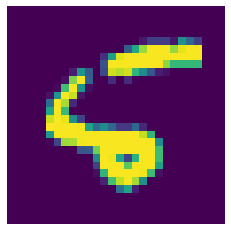

In [36]:
plt.imshow(Xnew[8]);plt.axis('off');

Let us now look at the layers. Layers can be referenced by indexes or names.

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


We can access and extract the individual layers:

In [38]:
hidden1 = model.layers[1]
print(hidden1.name)
print(type(hidden1))
model.get_layer(hidden1.name) is hidden1


dense
<class 'keras.layers.core.Dense'>


True

We can see the weights (and biases) for each layer.

In [39]:
weights, biases = hidden1.get_weights()

In [40]:
print(weights.shape, biases.shape)

(784, 300) (300,)


The weights are a matrix with as many rows as its input, and columns as its output.
$\bf y= x W + b$

In [41]:
print(weights[0,:10])
print(biases[:10])

[-0.05396671  0.02145576  0.02785318 -0.06505628  0.03732187 -0.06981263
  0.05656686  0.01151196  0.03702319  0.00490728]
[-0.00431803 -0.0093928   0.01321982  0.00496897  0.00876273  0.02201194
  0.04174145 -0.00266618  0.02374023  0.00700429]


### Exercise 3: Functional API
Write the same problem as exercise 2 but using Functional API.\
The functional API looks like a series of functions connected through inputs and outputs. \
We need to define input, layers and output and then build the model as a function that connects input(s) and output(s).

In [42]:
print(X[:].flatten().shape)

(39200000,)


In [43]:
input_ = keras.layers.Input(shape=(28,28))
inputf_ = keras.layers.Flatten(input_shape=[28,28])(input_)
hidden1 = keras.layers.Dense(300, activation="relu")(inputf_)
hidden2 = keras.layers.Dense(100, activation="relu")(hidden1)
output = keras.layers.Dense(10,activation="softmax")(hidden2)
model = keras.models.Model(inputs=[input_], outputs=[output])

In [44]:
type(input_),type(output),type(model)

(keras.engine.keras_tensor.KerasTensor,
 keras.engine.keras_tensor.KerasTensor,
 keras.engine.functional.Functional)

In [45]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [46]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])

In [47]:
history=model.fit(X,y,epochs=10,validation_data=(Xv,yv))

Epoch 1/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.6452 - accuracy: 0.8373 - val_loss: 0.3129 - val_accuracy: 0.9129
Epoch 2/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.3014 - accuracy: 0.9143 - val_loss: 0.2466 - val_accuracy: 0.9290
Epoch 3/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.2475 - accuracy: 0.9290 - val_loss: 0.2097 - val_accuracy: 0.9415
Epoch 4/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.2113 - accuracy: 0.9392 - val_loss: 0.1871 - val_accuracy: 0.9492
Epoch 5/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.1843 - accuracy: 0.9473 - val_loss: 0.1664 - val_accuracy: 0.9545
Epoch 6/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.1634 - accuracy: 0.9536 - val_loss: 0.1510 - val_accuracy: 0.9579
Epoch 7/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.1466 - accuracy: 0.9586 - val_loss: 0.1377 - val_accuracy:

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


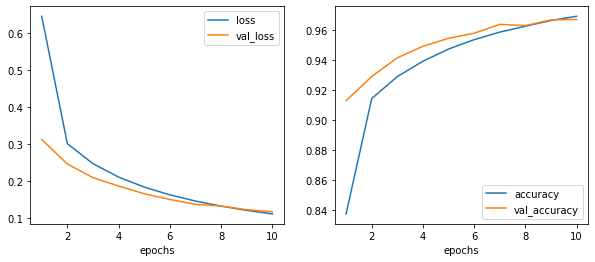

In [48]:
plot_history(history)

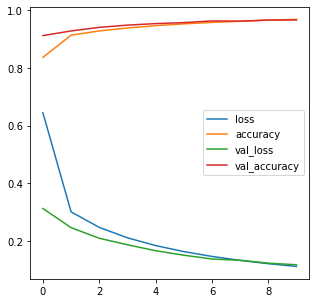

In [49]:
plot_historypd(history)

If we run again (with or without recompilation) it continues from the weights it has.

In [50]:
history2=model.fit(X,y,epochs=3,validation_data=(Xv,yv))

Epoch 1/3
1563/1563 [==============================] - 3s 2ms/step - loss: 0.1038 - accuracy: 0.9711 - val_loss: 0.1137 - val_accuracy: 0.9693
Epoch 2/3
1563/1563 [==============================] - 3s 2ms/step - loss: 0.0962 - accuracy: 0.9739 - val_loss: 0.1081 - val_accuracy: 0.9689
Epoch 3/3
1563/1563 [==============================] - 3s 2ms/step - loss: 0.0893 - accuracy: 0.9747 - val_loss: 0.1053 - val_accuracy: 0.9709


Question: where does the number 1563 comes from? What does it mean?

### Exercise 4: Subclassing API
Do the same as exercise 2 but with the subclassing API.

For subclassing we need to inherit from ```keras.models.Model``` and define the layers architecture in the constructor.\
The order does not matter since we are just defining variables, but it helps for clarity to have them in order.\
The ```call``` method is the one that defines the dataflow from the variables defined in the class.\
All other methods are inherited from Model. The call method is not called directly but from the other methods.\
Notice that the call method is like the functional API but without defining the layers that were defined in the constructor.

In [51]:
class Mnistexample(keras.models.Model):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.inputf = keras.layers.Flatten(input_shape=[28,28])
        self.hidden1 = keras.layers.Dense(300, activation="relu")
        self.hidden2 = keras.layers.Dense(100, activation="relu")
        self.main_output = keras.layers.Dense(10, activation="softmax")
        
    def call(self, input):
        inputf = self.inputf(input)
        hidden1 = self.hidden1(inputf)
        hidden2 = self.hidden2(hidden1)
        main_output = self.main_output(hidden2)        
        return main_output


In [52]:
# create an instance of the class
model = Mnistexample()

In [53]:
# the compile method is inherited from Model the same as the others
model.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])

In [54]:
history=model.fit(X,y, epochs=10, validation_data=(Xv,yv))

Epoch 1/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.6431 - accuracy: 0.8362 - val_loss: 0.3034 - val_accuracy: 0.9142
Epoch 2/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.2971 - accuracy: 0.9164 - val_loss: 0.2409 - val_accuracy: 0.9314
Epoch 3/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.2427 - accuracy: 0.9309 - val_loss: 0.2064 - val_accuracy: 0.9421
Epoch 4/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.2068 - accuracy: 0.9407 - val_loss: 0.1823 - val_accuracy: 0.9495
Epoch 5/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.1809 - accuracy: 0.9472 - val_loss: 0.1623 - val_accuracy: 0.9557
Epoch 6/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.1607 - accuracy: 0.9535 - val_loss: 0.1487 - val_accuracy: 0.9595
Epoch 7/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.1445 - accuracy: 0.9587 - val_loss: 0.1398 - val_accuracy:

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


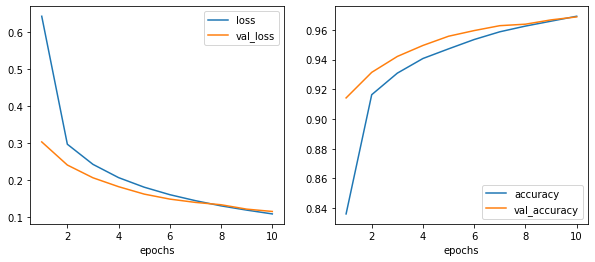

In [55]:
plot_history(history)

When inquiring information from the model, the information looks a bit different since the shape is not available.

In [56]:
model.summary()

Model: "mnistexample"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          multiple                  0         
_________________________________________________________________
dense_6 (Dense)              multiple                  235500    
_________________________________________________________________
dense_7 (Dense)              multiple                  30100     
_________________________________________________________________
dense_8 (Dense)              multiple                  1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [57]:
Xnew=Xt[0:20]
ynew=yt[0:20]
yproba=model.predict(Xnew)
print('predict produces a matrix with nsamples, nclasses',yproba.shape)
print(yproba.round(2))

predict produces a matrix with nsamples, nclasses (20, 10)
[[0.   0.   0.   0.   0.   0.   0.   1.   0.   0.  ]
 [0.   0.   0.99 0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.99 0.   0.   0.   0.   0.   0.   0.   0.  ]
 [1.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.97 0.   0.   0.   0.   0.02]
 [0.   0.99 0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.95 0.   0.   0.   0.04 0.01]
 [0.   0.   0.   0.   0.01 0.   0.   0.   0.   0.98]
 [0.   0.   0.01 0.   0.   0.   0.99 0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.01 0.   0.99]
 [1.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.01 0.   0.   0.   0.98 0.   0.01 0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.99]
 [1.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.03 0.   0.96 0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.99]
 [0.   0.   0.   0.   0.   0.   0.   1. 

In [58]:
print(ynew)

[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


In [59]:
print(np.argmax(model.predict(Xnew),axis=1))

[7 2 1 0 4 1 4 9 6 9 0 6 9 0 1 5 9 7 3 4]


### Exercise 5 - Regression MLP
Use the ```california_housing``` data set we used earlier in the course with linear regression and compare with MLP.

When doing regression the network looks very similar as in classification but there are a few differences:
* for metrics, instead of ```accuracy``` we need mean squared error or ```mse```.
* for activation in the last layer, instead of ```softmax``` we need ```relu``` or ```selu```.
* for cost function, instead of ```crossentropy``` we need ```mse``` or ```mae``` or ```huber```.\
Let us do some data preprocessing first.

In [60]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [61]:
type(housing),type(housing.data),type(X_train),X_train.shape,y_train.shape

(sklearn.utils.Bunch, numpy.ndarray, numpy.ndarray, (11610, 8), (11610,))

In [62]:
print(housing.data.shape)
print(housing.data[0:1])
print(X_train[0:1,:])
print(y_train[0:1])

(20640, 8)
[[   8.3252       41.            6.98412698    1.02380952  322.
     2.55555556   37.88       -122.23      ]]
[[-0.19397883 -1.07781319 -0.94338545  0.01485314  0.02073335 -0.57291624
   0.92926047 -1.42215523]]
[1.442]


Let us use the sequential API (in this case, an alternative form from what we first used above)

In [63]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3),metrics="mae")
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))


/home/dtrad/anaconda3/envs/tfgpu4/lib/python3.9/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/20
363/363 [==============================] - 2s 2ms/step - loss: 2.0533 - mae: 1.0548 - val_loss: 1.0664 - val_mae: 0.6930
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7397 - mae: 0.6328 - val_loss: 0.6311 - val_mae: 0.5901
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6314 - mae: 0.5865 - val_loss: 0.5843 - val_mae: 0.5598
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5843 - mae: 0.5621 - val_loss: 0.5324 - val_mae: 0.5364
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5483 - mae: 0.5425 - val_loss: 0.5038 - val_mae: 0.5181
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5215 - mae: 0.5278 - val_loss: 0.4800 - val_mae: 0.5035
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5015 - mae: 0.5162 - val_loss: 0.4615 - val_mae: 0.4932
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.

In [64]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 30)                270       
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 31        
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


Since we don't have "accuracy" we can't use print_history(history). Let us define a new one.

<built-in method items of dict object at 0x7efc3cc1eec0>
dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


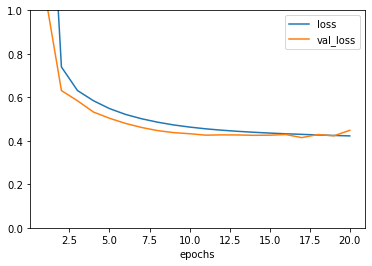

In [68]:
print(history.params.items)
def plot_history_reg(history):
    niter=history.params['epochs']
    print(history.history.keys())
    iter=np.arange(niter)+1
    plt.plot(iter,history.history['loss'],label='loss')
    plt.plot(iter,history.history['val_loss'],label='val_loss')
    plt.xlabel('epochs')
    plt.legend()
    plt.gca().set_ylim(0, 1)
plot_history_reg(history)

We can use a pandas dataframe to do other manipulations

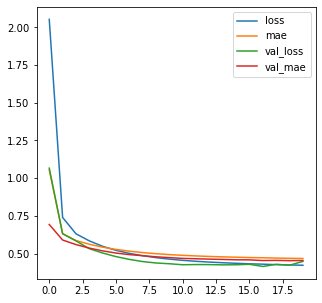

In [69]:
plot_historypd(history)

We can now evaluate how it performs in the test data set.

In [70]:
mse_test = model.evaluate(X_test, y_test)
nsamples=10 # set the number of samples.
X_new = X_test[:nsamples]
y_new = y_test[:nsamples]
mse_new = model.evaluate(X_new, y_new)
y_pred = model.predict(X_new)
print('true      ',np.round(y_new,2))
print('predicted',np.round(y_pred.T,2))


1/1 [==============================] - 0s 32ms/step - loss: 0.5814 - mae: 0.5937
true       [0.48 0.46 5.   2.19 2.78 1.59 1.98 1.58 3.4  4.47]
predicted [[0.84 1.82 3.34 2.62 2.65 2.02 2.57 1.8  3.01 4.11]]


In [71]:
print(mse_test)

[0.4189954698085785, 0.4661162197589874]


In [72]:
#model.evaluate?

Let us save the model and restore to a new instance of model.

In [73]:
model.save("my_keras_model.h5")

In [74]:
!ls -lat | head

total 884
-rw-rw-r--.  1 dtrad dtrad  17040 Nov  3 18:50 my_keras_model.h5
-rw-rw-r--.  1 dtrad dtrad 265461 Nov  3 18:49 Practice15-NeuralNetworks.ipynb
drwxrwxr-x.  5 dtrad dtrad   4096 Nov  3 17:18 .
drwxrwxr-x.  2 dtrad dtrad   4096 Nov  3 17:18 .ipynb_checkpoints
drwxrwxr-x. 65 dtrad dtrad   4096 Sep 30 12:58 ..
drwxr-xr-x.  7 dtrad dtrad   4096 Oct 29  2021 my_logs
-rw-rw-r--.  1 dtrad dtrad  85635 Jul  2  2021 FreePractice.ipynb
-rw-r--r--.  1 dtrad dtrad 495172 Nov  2  2020 10_neural_nets_with_keras.ipynb
-rw-rw-r--.  1 dtrad dtrad     99 Nov  2  2020 checkpoint


In [75]:
model2 = keras.models.load_model("my_keras_model.h5")

In [76]:
mse_new = model.evaluate(X_new, y_new)
mse_new2 = model2.evaluate(X_new, y_new)
y_pred2 = model2.predict(X_new)
print('predicted',np.round(y_pred2.T,2))
#print('predicted before',np.round(y_pred.T,2))
print('true',np.round(y_new,2))


1/1 [==============================] - 0s 98ms/step - loss: 0.5814 - mae: 0.5937
predicted [[0.84 1.82 3.34 2.62 2.65 2.02 2.57 1.8  3.01 4.11]]
true [0.48 0.46 5.   2.19 2.78 1.59 1.98 1.58 3.4  4.47]


### Exercise 6: Regression with complex dataflow
Use the functional API for the housing data set, and the examples seeing in the lecture to create the "wide and deep NN"  with 2 inputs and 2 outputs

We will arbitrarily create 2 data sets A and B, with features 0-4 for A and 2-8 for B

In [77]:
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]
print(X_train_A.shape, X_valid_A.shape, X_test_A.shape)
print(X_train_B.shape, X_valid_B.shape, X_test_B.shape)

(11610, 5) (3870, 5) (5160, 5)
(11610, 6) (3870, 6) (5160, 6)


In [78]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.models.Model(inputs=[input_A, input_B],
                           outputs=[output, aux_output])

In [80]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [81]:
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=5,
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/5
363/363 [==============================] - 2s 3ms/step - loss: 2.6538 - main_output_loss: 2.3147 - aux_output_loss: 5.7054 - val_loss: 2.6291 - val_main_output_loss: 2.4217 - val_aux_output_loss: 4.4948
Epoch 2/5
363/363 [==============================] - 1s 2ms/step - loss: 1.0980 - main_output_loss: 0.8123 - aux_output_loss: 3.6697 - val_loss: 1.3154 - val_main_output_loss: 1.0654 - val_aux_output_loss: 3.5657
Epoch 3/5
363/363 [==============================] - 1s 2ms/step - loss: 0.8168 - main_output_loss: 0.6358 - aux_output_loss: 2.4460 - val_loss: 0.9416 - val_main_output_loss: 0.6652 - val_aux_output_loss: 3.4297
Epoch 4/5
363/363 [==============================] - 1s 2ms/step - loss: 0.7043 - main_output_loss: 0.5737 - aux_output_loss: 1.8798 - val_loss: 0.8421 - val_main_output_loss: 0.5574 - val_aux_output_loss: 3.4044
Epoch 5/5
363/363 [==============================] - 1s 2ms/step - loss: 0.6484 - main_output_loss: 0.5388 - aux_output_loss: 1.6349 - val_loss: 0.7

### Exercise 7: Using CallBacks
Use a "callback" function to save the model at the end of each epoch, but only save if the model is the best so far in the iterations.

"callbacks" are pieces of executable code that is passed as an argument to other code, which is expected to execute the code at some predefined time.

In [82]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [83]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    

To use a callback, you need:
* create the instance of the class you choose from "keras.callbacks".
* include the callbacks argument in modelfit.

Notice, you can include more than one callback in "fit"

In [84]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])
model = keras.models.load_model("my_keras_model.h5") # rollback to best model
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 1.8866 - val_loss: 0.7126
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6577 - val_loss: 0.6880
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5934 - val_loss: 0.5803
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5557 - val_loss: 0.5166
Epoch 5/10
363/363 [==============================] - 1s 1ms/step - loss: 0.5272 - val_loss: 0.4895
Epoch 6/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5033 - val_loss: 0.4951
Epoch 7/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4854 - val_loss: 0.4861
Epoch 8/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4709 - val_loss: 0.4554
Epoch 9/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4578 - val_loss: 0.4413
Epoch 10/10
162/162 [==============================] - 0s 889us/step - loss: 0.4382


In [85]:
!ls -lat | head

total 892
-rw-rw-r--.  1 dtrad dtrad 269475 Nov  3 18:55 Practice15-NeuralNetworks.ipynb
-rw-rw-r--.  1 dtrad dtrad  23408 Nov  3 18:55 my_keras_model.h5
drwxrwxr-x.  5 dtrad dtrad   4096 Nov  3 17:18 .
drwxrwxr-x.  2 dtrad dtrad   4096 Nov  3 17:18 .ipynb_checkpoints
drwxrwxr-x. 65 dtrad dtrad   4096 Sep 30 12:58 ..
drwxr-xr-x.  7 dtrad dtrad   4096 Oct 29  2021 my_logs
-rw-rw-r--.  1 dtrad dtrad  85635 Jul  2  2021 FreePractice.ipynb
-rw-r--r--.  1 dtrad dtrad 495172 Nov  2  2020 10_neural_nets_with_keras.ipynb
-rw-rw-r--.  1 dtrad dtrad     99 Nov  2  2020 checkpoint


dict_keys(['loss', 'val_loss'])


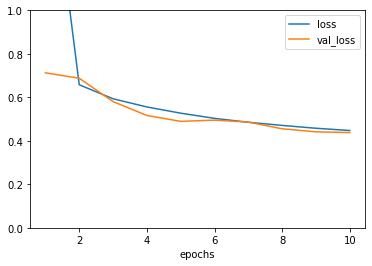

In [86]:
plot_history_reg(history)

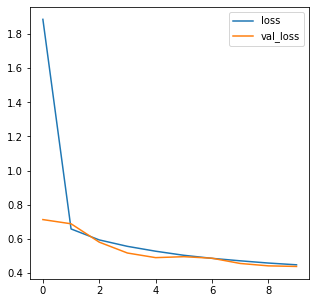

In [87]:
plot_historypd(history)

### Exercise 8: Using tensorboard
Save the history into a directory and visualize with tensorboard.

To save the data and visualize with tensorboard we need:
* create a unique directory 
* create a tensorboard callback
* run the network with the callback

In [88]:
root_logdir = os.path.join(os.curdir, "my_logs")
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
run_logdir

'./my_logs/run_2022_11_03-19_20_43'

In [89]:
!ls
print('\n')
!ls my_logs

10_neural_nets_with_keras.ipynb  my_keras_weights.ckpt.data-00000-of-00002
checkpoint			 my_keras_weights.ckpt.data-00001-of-00002
FreePractice.ipynb		 my_keras_weights.ckpt.index
images				 my_logs
my_keras_model.h5		 Practice15-NeuralNetworks.ipynb


run_2020_11_04-14_02_07  run_2021_10_27-10_04_51  run_2021_10_29-13_57_14
run_2021_10_23-20_00_50  run_2021_10_29-09_37_18


In [90]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [91]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [92]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

2022-11-03 19:21:48.419937: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-11-03 19:21:48.419984: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2022-11-03 19:21:48.473409: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1614] Profiler found 2 GPUs
2022-11-03 19:21:48.474022: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcupti.so.11.2'; dlerror: libcupti.so.11.2: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/rh/devtoolset-8/root/usr/lib64:/opt/rh/devtoolset-8/root/usr/lib:/opt/rh/devtoolset-8/root/usr/lib64/dyninst:/opt/rh/devtoolset-8/root/usr/lib/dyninst:/opt/rh/devtoolset-8/root/usr/lib64:/opt/rh/devtoolset-8/root/usr/lib:/usr/local/cuda/lib64:/home/dtrad/madagascar/lib:/usr/local/lib
2022-11-03 19:21:49.225786: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2022-11-03 19:2

Epoch 1/30
  2/363 [..............................] - ETA: 1:15 - loss: 7.0195

2022-11-03 19:21:49.611676: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-11-03 19:21:49.611712: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2022-11-03 19:21:49.807033: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2022-11-03 19:21:49.807321: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1748] CUPTI activity buffer flushed


 81/363 [=====>........................] - ETA: 1s - loss: 4.4215 

2022-11-03 19:21:49.864940: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:673]  GpuTracer has collected 59 callback api events and 57 activity events. 
2022-11-03 19:21:49.867843: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2022-11-03 19:21:49.896537: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: ./my_logs/run_2022_11_03-19_20_43/train/plugins/profile/2022_11_03_19_21_49

2022-11-03 19:21:49.899160: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to ./my_logs/run_2022_11_03-19_20_43/train/plugins/profile/2022_11_03_19_21_49/lula.trace.json.gz
2022-11-03 19:21:49.939285: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: ./my_logs/run_2022_11_03-19_20_43/train/plugins/profile/2022_11_03_19_21_49

2022-11-03 19:21:49.940182: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for memory_prof

363/363 [==============================] - 1s 3ms/step - loss: 1.8866 - val_loss: 0.7126
Epoch 2/30
363/363 [==============================] - 1s 2ms/step - loss: 0.6577 - val_loss: 0.6880
Epoch 3/30
363/363 [==============================] - 1s 2ms/step - loss: 0.5934 - val_loss: 0.5803
Epoch 4/30
363/363 [==============================] - 1s 2ms/step - loss: 0.5557 - val_loss: 0.5166
Epoch 5/30
363/363 [==============================] - 1s 2ms/step - loss: 0.5272 - val_loss: 0.4895
Epoch 6/30
363/363 [==============================] - 1s 2ms/step - loss: 0.5033 - val_loss: 0.4951
Epoch 7/30
363/363 [==============================] - 1s 2ms/step - loss: 0.4854 - val_loss: 0.4861
Epoch 8/30
363/363 [==============================] - 1s 2ms/step - loss: 0.4709 - val_loss: 0.4554
Epoch 9/30
363/363 [==============================] - 1s 2ms/step - loss: 0.4578 - val_loss: 0.4413
Epoch 10/30
363/363 [==============================] - 1s 2ms/step - loss: 0.4474 - val_loss: 0.4379
Epoch 11/3

To start the TensorBoard server, one option is to open a terminal, if needed activate the virtualenv where you installed TensorBoard, go to this notebook's directory, then type:

```bash
$ tensorboard --logdir=./my_logs --port=6006
```

You can then open your web browser to [localhost:6006](http://localhost:6006) and use TensorBoard. Once you are done, press Ctrl-C in the terminal window, this will shutdown the TensorBoard server.

Alternatively, you can load TensorBoard's Jupyter extension and run it like this:

In [93]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006